In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("marketing_campaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()
#check missing values
df.isnull().sum()
df = df.dropna(subset=['Income'])
#filter unrealistic outliers
df = df[df['Income'] < 600000]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df['Total_Spent'] = df[['MntWines','MntFruits','MntMeatProducts',
                        'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

df['Total_AcceptedCmp'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                              'AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

df['Age'] = 2025 - df['Year_Birth']

df['Family_Size'] = np.where(df['Marital_Status'].isin(['Married','Together']), 2, 1) \
                    + df['Kidhome'] + df['Teenhome']

# Drop unnecessary columns
df = df.drop(['ID', 'Year_Birth'], axis=1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent,Total_AcceptedCmp,Age,Family_Size
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,3,11,1,1617,1,68,1
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,3,11,0,27,0,71,3
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,3,11,0,776,0,60,2
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,3,11,0,53,0,41,3
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,0,3,11,0,422,0,44,3


In [4]:
label = LabelEncoder()
df['Education'] = label.fit_transform(df['Education'])
df['Marital_Status'] = label.fit_transform(df['Marital_Status'])

scaler = StandardScaler()
scaled = scaler.fit_transform(df.select_dtypes(include=np.number))

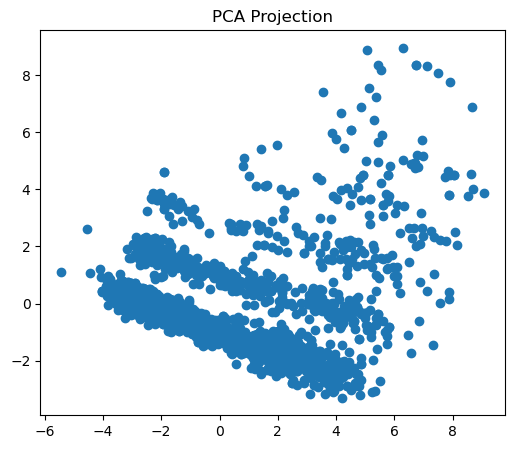

In [5]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

plt.figure(figsize=(6,5))
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.title('PCA Projection')
plt.show()

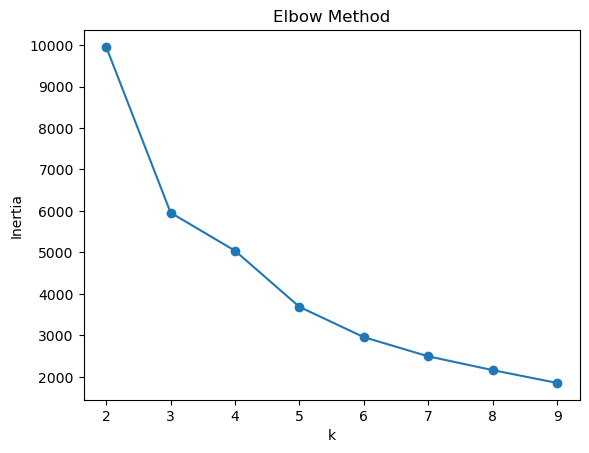

In [6]:
inertia = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_data)

score = silhouette_score(pca_data, df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.49046128279192713


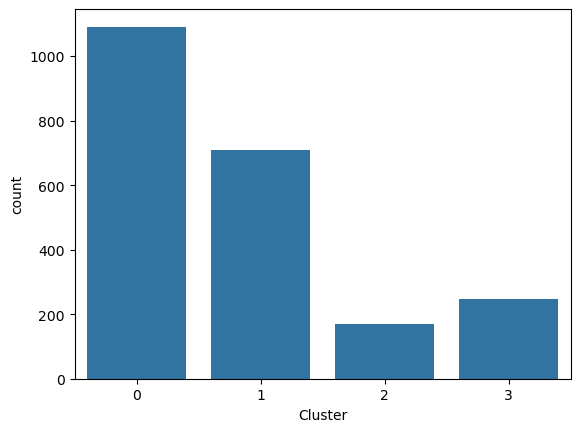

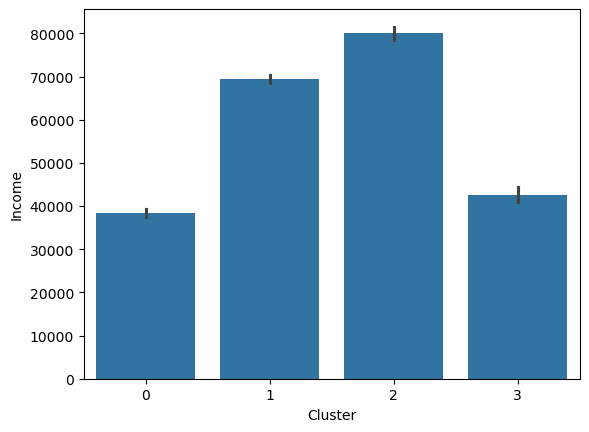

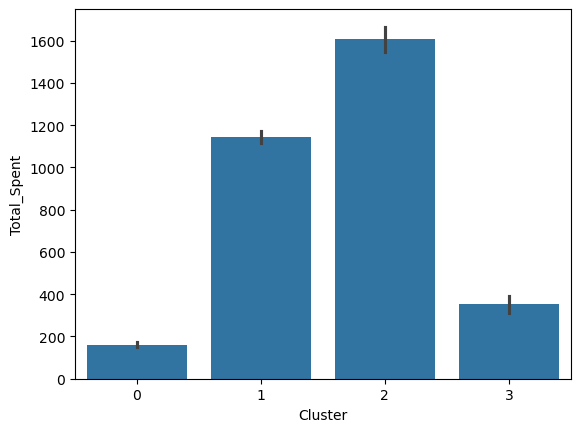

In [8]:
sns.countplot(x='Cluster', data=df)
plt.show()

sns.barplot(x='Cluster', y='Income', data=df)
plt.show()

sns.barplot(x='Cluster', y='Total_Spent', data=df)
plt.show()

In [9]:
cluster_summary = df.groupby('Cluster')[['Income','Age','Total_Spent','Family_Size','Total_AcceptedCmp']].mean()
cluster_summary

,Income,Age,Total_Spent,Family_Size,Total_AcceptedCmp
Cluster,,,,,
0,38401.383135,54.888176,161.814849,2.938588,0.009166
1,69464.741525,58.649718,1144.067797,2.166667,0.254237
2,80064.544379,55.005917,1608.331361,1.798817,2.869822
3,42531.939271,55.639676,351.696356,2.825911,1.291498


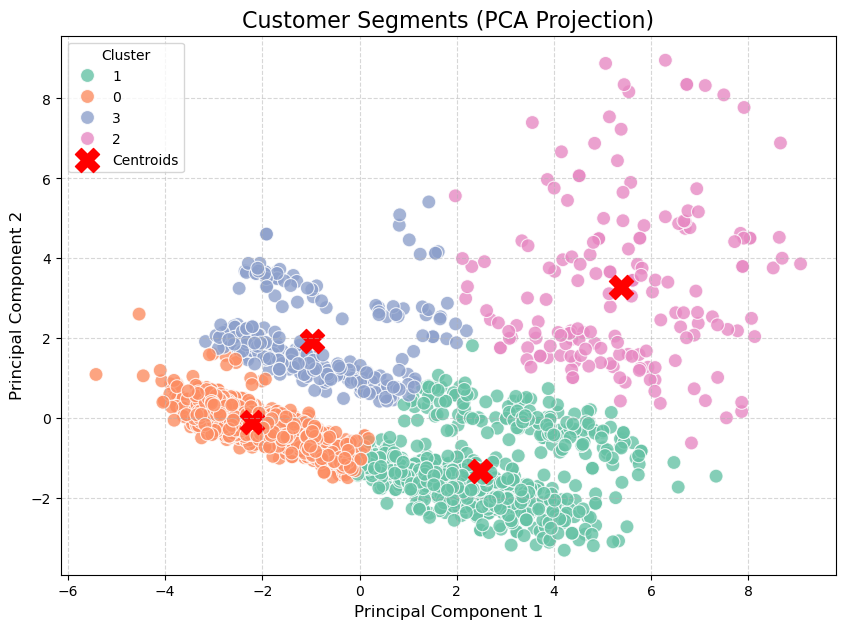

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

centroids = kmeans.cluster_centers_

plt.figure(figsize=(10,7))
sns.scatterplot(
    x=pca_data[:,0], y=pca_data[:,1],
    hue=df['Cluster'].astype(str),
    palette='Set2',
    s=100,
    alpha=0.8
)

# Plot cluster centroids
plt.scatter(centroids[:,0], centroids[:,1], 
            s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments (PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()